In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import *
from robot_tools import *
import math

### 7.6.1

In [80]:
def image_projection(w, h, nx, ny, f, coord_universe, coord_camera_to_universe, Display = False):
    
    [xp, yp, zp] = coord_universe 
    [x, y, z] = coord_camera_to_universe
    
    # Size of te individual pixel
    Dw = symbols('dw')
    Dh = symbols('dh')

    # Principal point (centre of the image)
    U0 = symbols('u0')
    V0 = symbols('v0')

    # Focal length in m
    F = symbols('f')

    # Coordinate of the object / point in the universe frame
    Xp = symbols('x_p')
    Yp = symbols('y_p')
    Zp = symbols('z_p')

    # Position of the camera relative to the universe
    X = symbols('x')
    Y = symbols('y')
    Z = symbols('z')

    # Camera parameters
    CM = Matrix([[F/Dw, 0, U0, 0],
                 [0, F/Dh, V0, 0],
                 [0, 0, 1, 0]])

    # Position of camera relative to the universe
    T0C = Matrix([[1, 0, 0, X],
                  [0, 1, 0, Y], 
                  [0, 0, 1, Z],
                  [0, 0, 0, 1]])

    P0 = Matrix([Xp, Yp, Zp, 1])
    
    RES = CM * T0C**-1 * P0
    homo_retina = RES.subs({U0: nx/2, V0: ny/2, 
                    F: f, 
                    Dw: w/nx, Dh: h/ny, 
                    Xp: xp, Yp: yp, Zp: zp, 
                    X: x, Y: y, Z: z})
    
    retina = Matrix([round(homo_retina[0]/homo_retina[-1], 1), 
                     round(homo_retina[1]/homo_retina[-1], 1)])
    
    if Display:
        print('Camera parameters matrix')
        display(CM.subs({F: f, Dw: w/nx, Dh: h/ny, U0: nx/2, V0: ny/2}))
        
        print('Position of camera to the universe')
        display(T0C.subs({X: x, Y: y, Z: z}))
        
        print('Position of the object in the universe')
        display(P0.subs({Xp: xp, Yp: yp, Zp: zp}))
        
        print('Retina coordinates homogeneous')
        display(homo_retina)
        
        print('Retina coordinates')
        display(retina)
        
        
    u, v = int(retina[0]), int(retina[1])
    return [u, v]
    
    


[552, 552, 648, 648, 560, 560, 639, 639]
[566, 433, 433, 566, 554, 445, 445, 554]
 
[373, 373, 826, 826, 414, 414, 785, 785]
[814, 185, 185, 814, 757, 242, 242, 757]
 


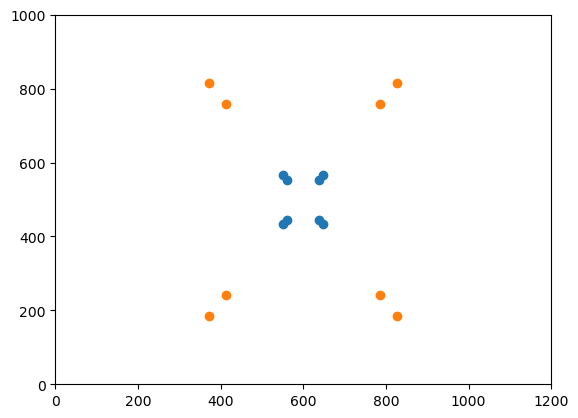

In [85]:
cube_vertices = [[-1, 1, -1], [-1, -1, -1], [1, -1, -1], [1, 1, -1],
                [-1, 1, 1], [-1, -1, 1], [1, -1, 1], [1, 1, 1]]

for f in [0.018, 0.085]:
    u_lst = []
    v_lst = []
    
    for i in cube_vertices:
        u, v = image_projection(w = 0.05, h = 0.03, 
                         nx = 1200, ny = 1000, 
                         f = f, 
                         coord_universe = i, 
                         coord_camera_to_universe = [0, 0, -10])
        u_lst.append(u)
        v_lst.append(v)

    print(u_lst)
    print(v_lst)
    print(' ')
    plt.scatter(u_lst, v_lst)
    plt.xlim(0, 1200)
    plt.ylim(0, 1000)

[600, 600, 696, 696, 600, 600, 678, 678]
[633, 500, 500, 633, 609, 500, 500, 609]
 
[600, 600, 1053, 1053, 600, 600, 970, 970]
[1129, 500, 500, 1129, 1015, 500, 500, 1015]
 


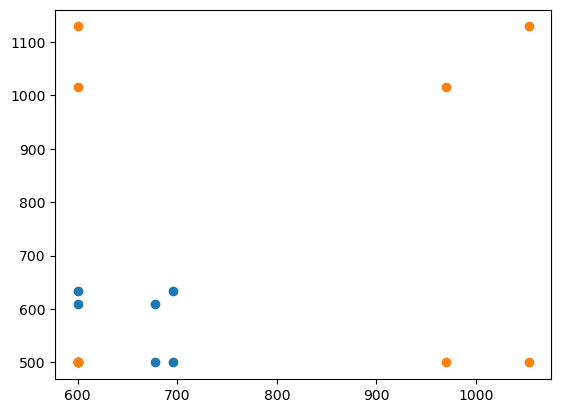

In [93]:
cube_vertices = [[-1, 1, -1], [-1, -1, -1], [1, -1, -1], [1, 1, -1],
                [-1, 1, 1], [-1, -1, 1], [1, -1, 1], [1, 1, 1]]

for f in [0.018, 0.085]:
    u_lst = []
    v_lst = []
    
    for i in cube_vertices:
        u, v = image_projection(w = 0.05, h = 0.03, 
                         nx = 1200, ny = 1000, 
                         f = f, 
                         coord_universe = i, 
                         coord_camera_to_universe = [-1, -1, -10])
        u_lst.append(u)
        v_lst.append(v)

    print(u_lst)
    print(v_lst)
    print(' ')
    plt.scatter(u_lst, v_lst)
#     plt.xlim(0, 1200)
#     plt.ylim(0, 1000)